In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 1D Heat conduction with uniform grid

## User inputs
rho = 7750
cp = 500
k = 16.2
L = 1e-2
i_max = 50
T0 = 30
T_eb =100
T_wb = 0
Q_vol_gen=100e6
epsilon_st = 0.0001

##Geometrical parameters
alpha = k/(rho*cp)
DTc = T_eb - T_wb
Dx = L/(i_max - 1)
Dt = 0.99*0.5*(Dx*Dx/alpha)
Q_gen = Q_vol_gen*Dx

## IC and BC
T = np.zeros(i_max)
T_old = np.zeros(i_max)
qx_old = np.zeros(i_max)
Q_cond_old = np.zeros(i_max)
T[1:i_max-1] = T0
T[0] = T_wb
T[i_max - 1] = T_eb

unsteadiness_nb = 1
n = 0

while (unsteadiness_nb >= epsilon_st):
    n = n+1
    for i in range(len(T)):
        T_old[i] = T[i]
    for i in range(i_max-1):
        if (i == 0 or i == i_max - 2):
            qx_old[i] = -k*(T_old[i+1] - T_old[i])/(Dx/2.0) 
        else:
            qx_old[i] = -k*(T_old[i+1] - T_old[i])/(Dx)
#     print(qx_old) 
    
    for i in range(1,i_max-1):
        Q_cond_old[i] = qx_old[i-1] - qx_old[i]
        T[i] = T_old[i] + (Dt/(rho*cp*Dx))*(Q_cond_old[i] + Q_gen)
           
    unsteadiness = max(abs(T_old - T))/Dt
    unsteadiness_nb = unsteadiness*L*L/(alpha*DTc)

In [3]:
print(T)

[  0.           4.1267692   12.12321323  19.86256313  27.34481919
  34.56998167  41.53805083  48.24902694  54.70291023  60.89970096
  66.83939936  72.52200565  77.94752006  83.11594278  88.02727401
  92.68151393  97.07866271 101.21872049 105.10168741 108.72756358
 112.09634913 115.20804412 118.06264864 120.66016274 123.00058644
 125.08391977 126.91016274 128.47931531 129.79137746 130.84634913
 131.64423025 132.18502074 132.46872049 132.49532938 132.26484727
 131.77727401 131.03260945 130.03085339 128.77200565 127.25606602
 125.48303429 123.45291023 121.1656936  118.62138417 115.81998167
 112.76148586 109.44589647 105.87321323 102.04343587 100.        ]


Text(0.01, 100.0, 'T = 100 $^0$C')

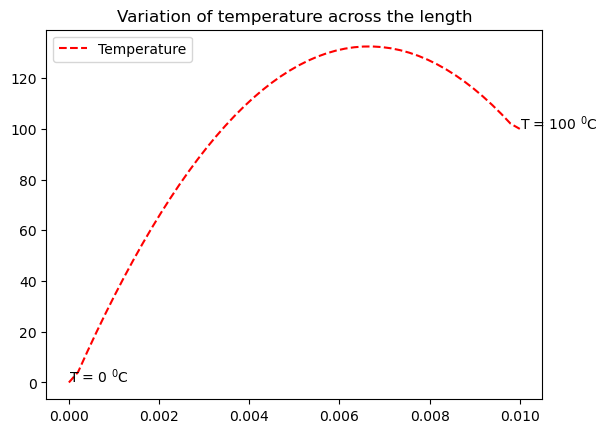

In [4]:
x = np.linspace(0,0.01,len(T))
plt.plot(x,T,'r--')
plt.legend(['Temperature'])
plt.title('Variation of temperature across the length')
plt.text(0,0,r'T = 0 $^0$C ')
plt.text(0.01,T[i_max-1],'T = 100 $^0$C')

In [5]:
## 1D Heat conduction with uniform grid

## User inputs
rho = 7750
cp = 500
k = 16.2
L1 = 1
L2 = 1
i_max = 50
j_max = 50
T0 = 30
T_eb =300
T_wb = 100
T_nb = 400
T_sb = 200
Q_vol_gen=0
epsilon_st = 0.00001

##Geometrical parameters
alpha = k/(rho*cp)
DTc = T_nb - T_wb
Dx = L1/(i_max - 1)
Dy = L2/(j_max -1)
Dt = 0.99*0.5*(alpha*((1/Dx**2) + (1/Dy**2)))**(-1)
Q_gen = Q_vol_gen*Dx*Dy

## IC and BC
T = np.zeros((i_max,j_max))
T_old = np.zeros((i_max,j_max))
qx_old = np.zeros((i_max-1,j_max-1))
Q_cond_old = np.zeros((i_max-1,j_max-1))
qy_old = np.zeros((i_max-1,j_max-1))
T[:,0] = T_sb
T[:,j_max - 1] = T_nb
T[0,:] = T_wb
T[i_max-1,:] = T_eb

unsteadiness_nb_2 = 1
n = 0

while (unsteadiness_nb_2 >= epsilon_st):
    n = n+1
    for i in range(i_max):
        for j in range(j_max):
            T_old[i,j] = T[i,j]
        
    for j in range(1,j_max-1):    
        for i in range(0,i_max-1):
            if (i == 0 or i == i_max - 2):
                qx_old[i,j] = -k*(T_old[i+1,j] - T_old[i,j])/(Dx/2.0) 
            else:
                qx_old[i,j] = -k*(T_old[i+1,j] - T_old[i,j])/(Dx) 
                
    for j in range(0,j_max-1):
        for i in range(1,i_max-1):
            if (j == 0 or j == j_max - 2):
                qy_old[i,j] = -k*(T_old[i,j+1] - T_old[i,j])/(Dx/2.0) 
            else:
                qy_old[i,j] = -k*(T_old[i,j+1] - T_old[i,j])/(Dx)
                
    for i in range(1,i_max-1):
        for j in range(1,j_max-1):
            Q_cond_old[i,j] = (qx_old[i-1,j] - qx_old[i,j])*Dy + (qy_old[i,j-1] - qy_old[i,j])*Dx
            T[i,j] = T_old[i,j] + (Dt/(rho*cp*Dx*Dy))*(Q_cond_old[i,j] + Q_gen)
           
    unsteadiness = np.amax(abs(T_old - T))/Dt
    unsteadiness_nb_2 = unsteadiness*L*L/(alpha*DTc)

In [6]:
x = np.linspace(0,L1,i_max)
y = np.linspace(0,L2,j_max)

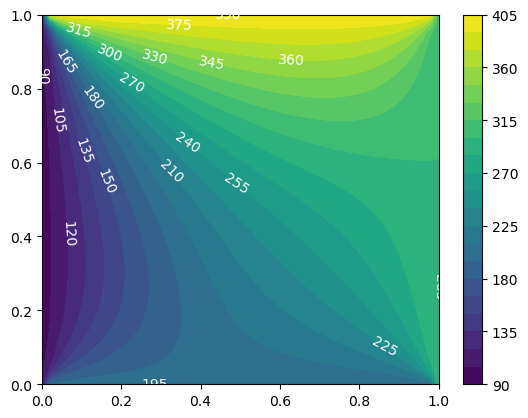

In [7]:
contours = plt.contourf(x,y,np.transpose(T),levels = 25)
plt.clabel(contours, inline=True, fontsize=10,colors = 'w')
plt.colorbar()

In [8]:
## 1D Heat conduction with non-uniform grid

## Grid generation
## Inputs

i_max = 20
beta = 1.2
L = 0.01

Dxi = L/(i_max - 1)

xi = np.linspace(0,1,i_max-1)
Dx = np.zeros(i_max)
dx = np.zeros(i_max-1)

Beta_p1 = beta + 1
Beta_m1 = beta - 1
Beta_p1_div_m1 = (Beta_p1/Beta_m1)**(2*xi - 1)

num = (Beta_p1*Beta_p1_div_m1) - Beta_m1
den = 2*(1 + Beta_p1_div_m1)

x = L*num/den

xc = np.zeros(i_max)
xc[1:i_max-1] = (x[1:i_max-1] + x[0:i_max-2])/2
xc[0] = x[0]
xc[i_max-1] = x[i_max-2]

Dx[1:i_max-1] = (x[1:i_max-1] - x[0:i_max-2])
Dx[0] = 0
Dx[i_max-1] = 0

dx[0:i_max-1] = (xc[1:i_max] - xc[0:i_max-1])

## User inputs

rho = 7750
cp = 500
k= 16.2

## IC and BC

T0 = 30
T_inf = 100
T_wb = 0
h = 1000
Q_vol_gen = 0
epsilon_st = 0.0001
Dt = 1
Q_gen = Q_vol_gen*(Dx)
ap0 = np.ones(i_max)
ap = np.ones(i_max)
T = np.ones(i_max)
T[1:i_max-1] = T0
T[0] = T_wb
unsteadiness_nb_3 = 1
n=0
alpha = k/(rho*cp)
DTc = T_inf - T_wb
T_old = np.ones(len(T))
T_old_iter=np.ones(len(T))
b = np.ones(i_max)



aE = np.zeros(i_max-1)
aE = k/dx
ap0 = rho*cp*Dx/Dt

for i in range(1,i_max-1):
    ap[i] = ap0[i] + aE[i] + aE[i-1]
            
while (unsteadiness_nb_3 >=epsilon_st):
    n = n+1
    T[i_max - 1] = k*(T[i_max-2]) + (h*(dx[i_max-2])*T_inf)
    T[i_max - 1] = T[i_max - 1]/(k + h*(dx[i_max-2]))
    
    for i in range(len(T)):
        T_old[i] = T[i]
        
    for i in range(1,i_max-1):
        b[i] = ap0[i]*T_old[i] + Q_gen[i]
     
    epsilon = 0.0001
    N=0
    Error = 1
    while (Error >= epsilon):
        T[i_max - 1] = k*(T[i_max-2]) + (h*(dx[i_max-2])*T_inf)
        T[i_max - 1] = T[i_max - 1]/(k + h*(dx[i_max-2]))
        for i in range(len(T)):
            T_old_iter[i] = T[i]
            
        N = N +1 
        
        for i in range(1,i_max-1):
            T[i] = aE[i]*T[i+1] + aE[i-1]*T[i-1] + b[i]
            T[i] = T[i]/ap[i]
            
        Error = np.amax(abs(T - T_old_iter))
        
    unsteadiness = np.amax(abs(T - T_old))/Dt
    unsteadiness_nb_3 = unsteadiness*L*L/(alpha*DTc)
    
            

In [9]:
print(xc)

[0.         0.00013646 0.00044116 0.00081377 0.00126188 0.0017901
 0.00239835 0.00308015 0.00382179 0.0046027  0.0053973  0.00617821
 0.00691985 0.00760165 0.0082099  0.00873812 0.00918623 0.00955884
 0.00986354 0.01      ]


In [10]:
# T = np.ones(i_max)
# T[1:i_max-1] = T0
# T[0] = T_wb

# T[i_max - 1] = k*(T[i_max-2]) + h*(dx[i_max-2])*T_inf
# T[i_max - 1] = T[i_max - 1]/(k + h*(dx[i_max-2]))

# print(T)

# for i in range(1,i_max-1):
#     T[i] = aE[i]*T[i+1] + aE[i-1]*T[i-1] + b[i]
#     T[i] = T[i]/ap[i]
    
# print(T)

In [11]:
print(T)

[ 0.          0.52115795  1.68488734  3.10793134  4.81926844  6.83657324
  9.15941224 11.76308579 14.59522152 17.5771934  20.61135351 23.59309339
 26.4247889  29.02785557 31.34997104 33.3664848  35.07700616 36.49924168
 37.66219062 38.18299266]


Text(0.01, 38.18299266409758, '$(h,T_{\\infy})$')

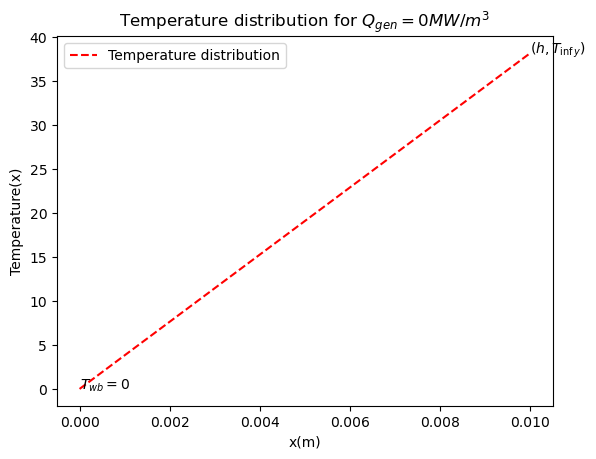

In [12]:
plt.plot(xc,T,'r--')
plt.legend(['Temperature distribution'])
plt.title(r'Temperature distribution for $Q_{gen}=0{MW}/{m^3}$')
plt.xlabel('x(m)')
plt.ylabel('Temperature(x)')
plt.text(0,0,r'$T_{wb} = 0$',fontsize = 10)
plt.text(0.01,max(T),r'$(h,T_{\infy})$',fontsize = 10)
         

In [13]:
## 2D Heat conduction with non-uniform grid

L1 = 1
L2 = 1
T_wb = 100
T0 = 30
h = 100
T_inf = 30
i_max = 12
j_max = 12

Dxi = L1/(i_max - 1)

xi = np.linspace(0,1,i_max-1)
Dx = np.zeros(i_max)
dx = np.zeros(i_max-1)

Beta_p1 = beta + 1
Beta_m1 = beta - 1
Beta_p1_div_m1_x = (Beta_p1/Beta_m1)**(2*xi - 1)

num_x = (Beta_p1*Beta_p1_div_m1_x) - Beta_m1
den_x = 2*(1 + Beta_p1_div_m1_x)


x = L1*num_x/den_x

xc = np.zeros(i_max)
xc[1:i_max-1] = (x[1:i_max-1] + x[0:i_max-2])/2
xc[0] = x[0]
xc[i_max-1] = x[i_max-2]

Dx[1:i_max-1] = (x[1:i_max-1] - x[0:i_max-2])
Dx[0] = 0
Dx[i_max-1] = 0

dx[0:i_max-1] = (xc[1:i_max] - xc[0:i_max-1])


## Grid in y direction 

Dyi = L2/(j_max - 1)

yi = np.linspace(0,1,j_max-1)
Dy = np.zeros(i_max)
dy = np.zeros(i_max-1)

Beta_p1 = beta + 1
Beta_m1 = beta - 1
Beta_p1_div_m1_y = (Beta_p1/Beta_m1)**(2*yi - 1)

num_y = (Beta_p1*Beta_p1_div_m1_y) - Beta_m1
den_y = 2*(1 + Beta_p1_div_m1_y)


y = L2*num_y/den_y

yc = np.zeros(j_max)
yc[1:j_max-1] = (y[1:j_max-1] + y[0:j_max-2])/2
yc[0] = y[0]
yc[j_max-1] = y[j_max-2]

Dy[1:j_max-1] = (y[1:j_max-1] - y[0:j_max-2])
Dy[0] = 0
Dy[j_max-1] = 0

dy[0:j_max-1] = (yc[1:j_max] - yc[0:j_max-1])



Xc,Yc = np.meshgrid(xc,yc)


rho = 7750
cp = 500
k= 16.2

## IC and BC

Q_vol_gen = 5e3
epsilon_st = 0.0001
Dt = 1000

aE = np.ones((i_max,j_max))
aN = np.ones((i_max,j_max))
ap0 = np.ones((i_max,j_max))
ap = np.ones((i_max,j_max))
b = np.ones((i_max,j_max))

for j in range(1,j_max-1):
    for i in range(0,i_max - 1):
        aE[i,j] = k*Dy[j]/dx[i]
                             
for j in range(0,j_max-1):
    for i in range(1,i_max-1):
        aN[i,j] = k*Dx[i]/dy[j]

for i in range(1,i_max-1):
    for j in range(1,j_max-1):
        ap0[i,j] = rho*cp*Dx[i]*Dy[i]/Dt 
        ap[i,j] = ap0[i,j] + aE[i,j] + aE[i-1,j] + aN[i,j] + aN[i,j-1]
        
T = np.ones((i_max,j_max))
T[1:i_max-1,1:j_max-1] = T0
T[0,:] = T_wb
T_old = np.ones((i_max,j_max))
T_old_iter = np.ones((i_max,j_max))

print(T)
unsteadiness_nb_3 = 1
n = 0
DTc = T_wb - T_inf
alpha = k/(rho*cp)
qw = 10e3

while (unsteadiness_nb_3 >= epsilon_st):
    n =n +1
    for j in range(j_max):
        T[i_max-1,j] = T[i_max-2,j] + (qw*(dx[i_max - 2])/k)
        
    for i in range(i_max):
        T[i,0] = T[i, 1]
        T[i,j_max - 1] = k*T[i,j_max - 2] + (h*dy[j_max -2]*T_inf)
        T[i,j_max - 1] = T[i,j_max - 1]/(k + h*dy[j_max -2])

    for i in range(i_max):
        for j in range(j_max):
            T_old[i,j] = T[i,j]
            
    for i in range(1,i_max-1):
        for j in range(1,j_max-1):
            b[i,j] = ap0[i,j]*T_old[i,j] + Q_vol_gen*Dx[i]*Dy[j]
            
    epsilon = 0.0001
    N = 0
    Error =1
    
    while (Error >= epsilon):
        N = N + 1
        
        for j in range(j_max):
            T[i_max-1,j] = T[i_max-2,j] + qw*dx[i_max - 2]/k
        
        for i in range(i_max):
            T[i,0] = T[i,1]
            T[i,j_max - 1] = k*T[i,j_max - 2] + (h*dy[j_max -2]*T_inf)
            T[i,j_max - 1] = T[i,j_max - 1]/(k + h*dy[j_max -2])       
            
        for i in range(i_max):
            for j in range(j_max):
                T_old_iter[i,j] = T[i,j] 
        
        for i in range(1,i_max-1):
            for j in range(1,j_max - 1):
                T[i,j] = (aE[i,j]*T[i+1,j] + aE[i-1,j]*T[i-1,j] + aN[i,j]*T[i,j+1] + aN[i,j-1]*T[i,j-1] + b[i,j])/(ap[i,j])
                
        Error = np.amax(abs(T - T_old_iter))
        
        
    unsteadiness = np.amax(abs(T - T_old))
    unsteadiness_nb_3 = unsteadiness*L1*L1/(alpha*DTc)
    
    


[[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]]


In [14]:
print(T)

[[100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.
  100.          90.05412226]
 [114.63025077 114.63025077 114.54361513 114.25341502 113.58001402
  112.32402526 110.36219211 107.71316091 104.42088074 100.08145869
   92.69463023  83.78672841]
 [149.10854229 149.1085423  148.81264969 147.82156693 145.52222158
  141.23600266 134.55258774 125.58350413 114.7349108  102.17115705
   88.11566772  79.85836307]
 [194.96649592 194.96649593 194.38814405 192.451343   187.96068042
  179.60470188 166.64521278 149.5397014  129.85073484 109.68876749
   91.38716163  82.66503014]
 [251.9586274  251.95862741 251.03553265 247.94525285 240.78761158
  227.508248   207.07914618 180.67617877 151.67885812 124.24613331
  101.49832486  91.33955918]
 [317.87459109 317.8745911  316.58403416 312.26464388 302.26805817
  283.76300883 255.46289632 219.39313011 180.79692183 145.53727939
  117.21616331 104.82414478]
 [388.65814266 388.65814268 387.035671

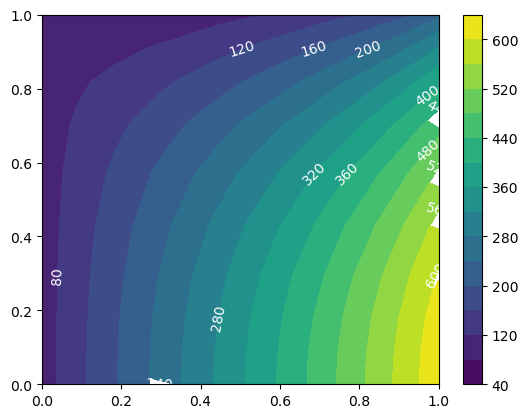

In [15]:
contours = plt.contourf(Xc,Yc,np.transpose(T),levels = 15)
plt.clabel(contours, inline=True, fontsize=10,colors = 'w')
plt.colorbar()

In [38]:
## 1D Heat advection 

## Inputs

rho = 1000
cp = 4180
L1 = 1
L2 = 1
i_max = 25
j_max = 25
T0 = 0.5
T_wb = 1
T_sb = 0
u = 1
v = 1
epsilon_st = 0.0001

scheme = int(input('Enter the Advection Scheme '))

def weights(scheme,k):
    w = np.ones(3)
    if (scheme == 1):
        w[0] = 0 
        w[1] = 1
        w[2] = 0
        
    if (scheme == 2) :
        if (k == 1) :
            w[0] = 0
            w[1] = 2
            w[2] = -1
        else:
            w[0] = 0
            w[1] = 3/2
            w[2] = -1/2
            
    if (scheme == 3):
        if ( k == 1):
            w[0] = 1/3
            w[1] = 1
            w[2] = -1/3
            
        else:
            w[0] = 3/8
            w[1] = 6/8
            w[2] = -1/8
            
    return w

Dx = L1/(i_max - 1)
Dy = L2/(j_max - 1)

Dt = (abs(u)/Dx + abs(v)/Dx)**(-1)

if (scheme == 2):
    Dt = (2/3)*Dt
    
if (scheme == 3):
    Dt = (4/9)*Dt
    
## Setting up IC and BC

T = np.ones((i_max,j_max))
T[1:i_max-1,1:j_max-1] = T0
T[0,:] = T_wb
T[:,0] = T_sb
T_old = np.ones((i_max,j_max))

mx = rho*u
my = rho*v

mx_p = max(mx,0)
mx_m = min(mx,0)
my_p = max(my,0)
my_m = min(my,0)

def Temp_f(w,T1,T2,T3,T4):
    T = np.ones(2)
    T[0] = w[0]*T3 + w[1]*T2 + w[2]*T1
    T[1] = w[0]*T2 + w[1]*T2 + w[2]*T4
    
    return T

Te_p = np.ones(i_max)
Te_m = np.ones(i_max)
Tn_p = np.ones(j_max)
Tn_m = np.ones(j_max)

unsteadiness_nd = 1
n = 0

hx_old = np.ones((i_max,j_max))
hy_old = np.ones((i_max,j_max))

Q_adv_old = np.ones((i_max-1,j_max-1))
# Te_p = np.ones((i_max,j_max))
# Te_m = np.ones((i_max,j_max))
while (unsteadiness_nd >=epsilon_st):
    T[i_max - 1,:] = T[i_max-2,:]
    T[:,j_max-1] = T[:,j_max-2]
    
    for i in range(i_max):
        for j in range(j_max):
            T_old[i,j] = T[i,j]
    
    for j in range(1,j_max-1):
        for i in range(0,i_max-1):
            if(i == 0 or i== i_max -2):
                Te_p[i] = T_old[i,j]
                Te_m[i] = T_old[i+1,j]
                
            else:
                w = weights(scheme,i)
                m = Temp_f(w,T_old[i-1,j],T_old[i,j],T_old[i+1,j],T_old[i+2,j])
                Te_p[i] = m[0]
                Te_m[i] = m[1]
            
            hx_old[i,j] = cp*(mx_p*Te_p[i] + mx_m*Te_m[i])
            
        
    for i in range(1,i_max-1):
        for j in range(0,j_max-1):
            if(j == 0 or j== j_max -2):
                Tn_p[j] = T_old[i,j]
                Tn_m[j] = T_old[i,j+1]
                
            else:
                w = weights(scheme,i)
                m = Temp_f(w,T_old[i,j-1],T_old[i,j],T_old[i,j+1],T_old[i,j+2])
                Tn_p[j] = m[0]
                Tn_m[j] = m[1]
            
            hy_old[i,j] = cp*(my_p*Tn_p[j] + my_m*Tn_m[j])
            
            
    for j in range(1,j_max-1):
        for i in range(1,i_max-1):
            Q_adv_old[i,j] =(( hx_old[i,j]-hx_old[i-1,j])*Dy) +((hy_old[i,j]-hy_old[i,j-1])*Dx)
            
            T[i,j]=T_old[i,j]-(Dt/(rho*cp*Dx*Dy))*Q_adv_old[i,j];
      
    
    unsteadiness_nd = np.amax((T - T_old))/Dt
    

Enter the Advection Scheme 1


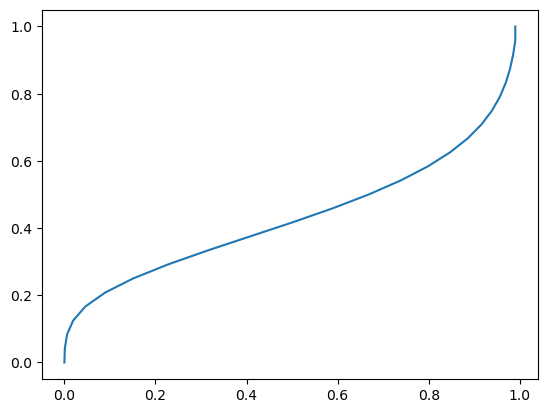

In [42]:

x = np.linspace(0,L1,i_max)
y = np.linspace(0,L2,j_max)

plt.plot(T[10,:],y)

In [240]:
rho = 1000
L1 = 1
L2 = 1
i_max = 52
j_max = 52
u = -1
v = -1
T0 = 0.5
T_eb = 0
T_nb = 1

epsilon = 0.0001
Dt = 0.5

xc_1 = np.ones(i_max)

Beta=1.2
xi= np.linspace (0,1,i_max -1);
Beta_p1= Beta+1
Beta_m1=Beta -1
Beta_p1_div_m1=( Beta_p1/Beta_m1) **(2*xi -1)
num=(Beta_p1* Beta_p1_div_m1)-Beta_m1
den=2*(1+Beta_p1_div_m1)

x=L1*num/den

y=x;
xc_1[1:i_max -1]=(x[1:i_max -1]+x[0:i_max -2])/2;
xc_1[0]=x[0]
xc_1[i_max-1]=x[i_max -2]

yc_1=xc_1

Dx = np.ones(i_max)
Dx[1:i_max -1]=x[1:i_max -1]-x[0:i_max -2]
Dx[0]=0
Dx[i_max-1]=0

Dy=Dx

scheme = int(input('Enter the Advection Scheme'))

if (scheme == 1):
    omega = 1

if (scheme == 2):
    omega = 0.85

if (scheme == 3):
    omega = 0.5

def weights(scheme,Ds_D,Ds_U,Ds_UU):
    w = np.ones(3)
    if (scheme == 1):
        w[0] = 0
        w[1] = 1
        w[2] = 0
    elif (scheme == 2):
        w[0] = 0
        w[1] = (2*Ds_U + Ds_UU)/(Ds_U + Ds_UU)
        w[2] = -Ds_U/(Ds_U + Ds_UU)
        
    elif (scheme == 3):
        w[0] = Ds_U*(2*Ds_U + Ds_UU)
        w[0] = w[0]/((Ds_D + Ds_U)*(Ds_D + 2*Ds_U + Ds_UU))
        
        w[1]=Ds_D*(2*Ds_U+Ds_UU);
        w[1]=w[1]/((Ds_D+Ds_U)*(Ds_U+Ds_UU))
        
        w[2]=-Ds_D*Ds_U
        w[2]=w[2]/((Ds_U+Ds_UU)*(Ds_D+2*Ds_U+Ds_UU))
        
    return w

we_p = np.ones((i_max-1,3))
we_m = np.ones((i_max-1,3))
wn_p = np.ones((i_max-1,3))
wn_m = np.ones((i_max-1,3))


for i in range(1,i_max-2):
    we = weights(scheme,Dx[i+1],Dx[i],Dx[i-1])
    we_p[i,0:3] = we
    we = weights(scheme,Dx[i],Dx[i+1],Dx[i+2])
    we_m[i,0:3] = we

for j in range(1,j_max-2):
    wn = weights(scheme,Dy[j+1],Dy[j],Dy[j-1])
    wn_p[j,0:3] = wn
    wn = weights(scheme,Dy[j],Dy[j+1],Dy[j+2])
    wn_m[j,0:3] = wn        

T = np.ones((i_max,j_max))    
T[1:i_max -1,1:j_max -1]=T0;
T[i_max-1 ,0: j_max]=T_eb
T[0: i_max , j_max-1]=T_nb

mx = rho*u
my = rho*v

mx_p = max(mx,0)
mx_m = min(mx,0)
my_p = max(my,0)
my_m = min(my,0)

aE = np.ones((i_max-1,j_max-1))
aN = np.ones((i_max-1,j_max-1))
ap = np.ones((i_max-1,j_max-1))
ap0 = np.ones((i_max-1,j_max-1))


for j in range(1,j_max-1):
    for i in range(0,i_max-1):
        aE[i,j] = -mx_m*Dy[j]
        
for j in range(0,j_max-1):
    for i in range(1,i_max-1):
        aN[i,j] = -my_m*Dx[i]
        
        
for i in range(1,i_max-1):
    for j in range(1,j_max - 1):
        ap0[i,j] = rho*Dx[i]*Dy[j]/Dt
        ap[i,j] = ap0[i,j] + aE[i,j] + aE[i-1,j] + mx*Dy[j] + my*Dx[i] + aN[i,j] + aN[i,j-1]
        
def Temp_f_d(k,wf_m,wf_p,T1,T2,T3,T4):
    Tfd1 = wf_p[k,0]*T3 + (wf_p[k,1]-1)*T2 + wf_p[k,2]*T1
    Tfd2 = wf_m[k,0]*T2 + (wf_m[k,1]-1)*T3 + wf_m[k,2]*T4
    return Tfd1,Tfd2

unsteadiness_nd = 1
n = 0
Ntot = 0

T_old = np.ones((i_max,j_max))
T_old_iter = np.ones((i_max,j_max))
Ted_p = np.ones((i_max-1,j_max-1))
Ted_m = np.ones((i_max-1,j_max-1))
Tnd_p = np.ones((i_max-1,j_max-1))
Tnd_m = np.ones((i_max-1,j_max-1))

while(unsteadiness_nd>= epsilon_st):
    n = n+1
    for j in range(j_max):
        T[0,i] = T[1,i]
        T[j,0] = T[j,1]
    
    for i in range(i_max):
        for j in range(j_max):
            T_old[i,j] = T[i,j]
            
    epsilon = 0.0001
    N = 0
    Error = 1
    while(Error >= epsilon):
        for j in range(j_max):
            T[0,i] = T[1,i]
            T[j,0] = T[j,1]
        
        for i in range(i_max):
            for j in range(j_max):
                T_old_iter[i,j] = T[i,j]
                
        N = N+1
                
        for j in range(1,j_max-1):
            for i in range(0,i_max-1):
                if (i==0 or  i == i_max-2):
                    Ted_p[i,j] = 0
                    Ted_m[i,j] = 0
                    
                else:
                    m = Temp_f_d(i,we_p ,we_m ,T_old_iter[i-1,j],T_old_iter[i,j],T_old_iter[i+1,j],T_old_iter[i+2,j])
                    Ted_p[i,j]=m[0]
                    Ted_m[i,j]=m[1]
                    
        for i in range(1,i_max-1):
            for j in range(0,j_max-1):
                if (j == 0 or j == j_max-2):
                    Tnd_p[i,j] = 0
                    Tnd_m[i,j] = 0
                    
                else:
                    e= Temp_f_d(j,wn_p ,wn_m ,T_old_iter[i,j-1],T_old_iter[i,j],T_old_iter[i,j+1],T_old_iter[i,j+2])
                    Tnd_p[i,j]=e[0]
                    Tnd_m[i,j]=e[1]
                    
            
        for j in range(1,j_max-1):
            for i in range(1,i_max - 1):
                Qd_adv_old_iter=(mx_p*Ted_p[i,j]+mx_m*Ted_m[i,j])*Dy[j] -(mx_p*Ted_p[i-1,j]+
                                                                          mx_m*Ted_m[i-1,j])*Dy[j]
                
                Qd_adv_old_iter = Qd_adv_old_iter + ( my_p*Tnd_p[i,j] + my_m*Tnd_m[i,j])*Dx[i]
                -(my_p*Tnd_p[i,j-1]+my_m*Tnd_m[i,j-1])*Dx[i]
                
                b = ap0[i,j]*T_old[i,j] - Qd_adv_old_iter
                
                T[i,j]=aE[i,j]*T[i+1,j]+(aE[i-1,j]+mx*Dy[j])*T[i-1,j]+aN[i,j]*T[i,j+1]+(aN[i,j-1]+my*Dx[i])*T[i,j-1]+b
                
                T[i,j]=T[i,j]/ap[i,j]
                
        
        T=T_old_iter + omega*(T-T_old_iter)
        
        Error = np.amax((abs(T - T_old_iter)))
    


        
    
    Ntot = Ntot + N
    unsteadiness_nd = np.amax((abs(T - T_old)))/Dt
        
        

Enter the Advection Scheme1


In [241]:

SOU = np.ones((i_max,j_max))
FOU = np.ones((i_max,j_max))

for i in range(i_max):
    for j in range(j_max):
        FOU[i,j] = T[i,j]

In [233]:
def fun(y):
    f=0
    if(y <= 0.5):
        f = 0
    if(y > 0.5):
        f = 1
    return f

In [234]:
f = np.ones(len(yc_1))
for i in range(len(yc_1)):
    f[i] = fun(yc_1[i])

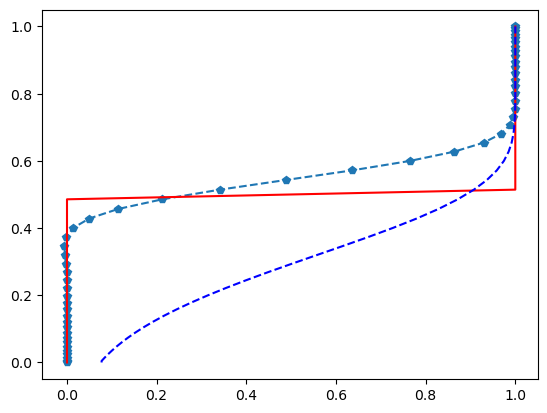

In [253]:

plt.plot(QUICK[8,:],yc_1,'p--')
plt.plot(f,yc_1,'r')
plt.plot(FOU[18,:],yc_1,'b--')